<a href="https://colab.research.google.com/github/carvalheiracarlos/deep_leaning_notebooks/blob/main/mnist_FeedFoward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Descrição da Tarefa



Partindo do notebook utlilizado na aula passada, que pode ser encontrado no link abaixo (para quem não veio):

https://github.com/rdsmaia/dim0494/blob/main/notebooks/hands_on_keras.ipynb

Faça:

1) projete uma rede neural com somente camadas do tipo feed-forward (dense) para resolver o problema.

2) compare a acurácia da rede feed-forward com a rede CNN. Como a rede feed-forward compara-se com a CNN em termos de número de parâmetros e tempo de treinamento?

3) Utilize callbacks para salvar a história do treinamento e plotar gráficos da evolução do erro para as duas redes. Plote os erros de treinamento e validação a cada época: curvas de aprendizado.

opcional 4) Seria possível utilizar uma rede com camadas recorrentes para reconhecer dígitos escritos?

Opções para envio da tarefa:

notebook;

link;

pdf;

mostrar em sala.

# Import


In [28]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [29]:
#Clean Up Cell
#rm -rf ./logs/ *.h5
#%load_ext tensorboard
#%tensorboard --logdir logs/cnn/train

# Data Handling


In [30]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [31]:
def class_arrays(index):
  return X_train[y_train==index], y_train[y_train==index]

separeted_classes_dictionary = {0: [], 1: [], 
                                2: [], 3: [],
                                4: [], 5: [],
                                6: [], 7: [],
                                8: [], 9: []}

for it in range(10):
  separeted_classes_dictionary[it] = class_arrays(it)

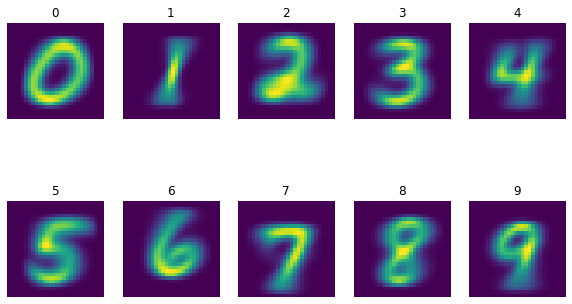

In [32]:
fig = plt.figure(figsize=(10, 6))
for it in range(10):
  plt.subplot(2, 5, it+1)
  plt.axis('off')
  plt.title(it)
  plt.imshow(separeted_classes_dictionary[it][0].mean(axis=0).squeeze())

In [33]:
num_classes = 10
input_shape = (28, 28, 1)

In [34]:
# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [35]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train shape:", y_train.shape)

y_train shape: (60000, 10)


# drsmaia CNN

In [36]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_6 (Dropout)         (None, 1600)             

In [37]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='./cnn/model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/cnn/'),
]

In [38]:
# Hyperparameters
batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# model training
cnn_fit = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1, callbacks=callbacks)

Epoch 1/15
422/422 [==============================] - 26s 62ms/step - loss: 0.3724 - accuracy: 0.8854 - val_loss: 0.0816 - val_accuracy: 0.9787
Epoch 2/15
422/422 [==============================] - 27s 63ms/step - loss: 0.1072 - accuracy: 0.9674 - val_loss: 0.0543 - val_accuracy: 0.9848
Epoch 3/15
422/422 [==============================] - 26s 61ms/step - loss: 0.0794 - accuracy: 0.9756 - val_loss: 0.0472 - val_accuracy: 0.9870
Epoch 4/15
422/422 [==============================] - 26s 61ms/step - loss: 0.0698 - accuracy: 0.9786 - val_loss: 0.0416 - val_accuracy: 0.9892
Epoch 5/15
422/422 [==============================] - 26s 61ms/step - loss: 0.0593 - accuracy: 0.9815 - val_loss: 0.0364 - val_accuracy: 0.9897
Epoch 6/15
422/422 [==============================] - 26s 61ms/step - loss: 0.0557 - accuracy: 0.9832 - val_loss: 0.0338 - val_accuracy: 0.9905
Epoch 7/15
422/422 [==============================] - 26s 61ms/step - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.0336 - val_accuracy:

In [49]:
cnn_results = model.evaluate(X_test, y_test, batch_size=128)

79/79 [==============================] - 1s 17ms/step - loss: 0.0280 - accuracy: 0.9911


# FeedFoward


In [39]:
feed_foward_model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        keras.layers.Dense(16, activation="sigmoid"),
        keras.layers.Dense(8, activation="sigmoid"),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

feed_foward_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 28, 28, 16)        32        
                                                                 
 dense_18 (Dense)            (None, 28, 28, 8)         136       
                                                                 
 flatten_7 (Flatten)         (None, 6272)              0         
                                                                 
 dropout_7 (Dropout)         (None, 6272)              0         
                                                                 
 dense_19 (Dense)            (None, 10)                62730     
                                                                 
Total params: 62,898
Trainable params: 62,898
Non-trainable params: 0
_________________________________________________________________


In [40]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(filepath='./feed_foward/model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/feed_foward/'),
]

In [41]:
# Hyperparameters
batch_size = 128
epochs = 15
feed_foward_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# model training
feed_foward_fit = feed_foward_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1, callbacks=callbacks)

Epoch 1/15
422/422 [==============================] - 8s 17ms/step - loss: 2.2357 - accuracy: 0.2178 - val_loss: 1.2574 - val_accuracy: 0.6960
Epoch 2/15
422/422 [==============================] - 7s 17ms/step - loss: 0.7153 - accuracy: 0.7814 - val_loss: 0.3757 - val_accuracy: 0.8895
Epoch 3/15
422/422 [==============================] - 7s 17ms/step - loss: 0.4645 - accuracy: 0.8590 - val_loss: 0.3118 - val_accuracy: 0.9103
Epoch 4/15
422/422 [==============================] - 7s 17ms/step - loss: 0.4088 - accuracy: 0.8776 - val_loss: 0.2811 - val_accuracy: 0.9187
Epoch 5/15
422/422 [==============================] - 7s 17ms/step - loss: 0.3861 - accuracy: 0.8850 - val_loss: 0.2589 - val_accuracy: 0.9265
Epoch 6/15
422/422 [==============================] - 7s 17ms/step - loss: 0.3666 - accuracy: 0.8906 - val_loss: 0.2528 - val_accuracy: 0.9298
Epoch 7/15
422/422 [==============================] - 7s 17ms/step - loss: 0.3562 - accuracy: 0.8955 - val_loss: 0.2446 - val_accuracy: 0.9312

# Plots


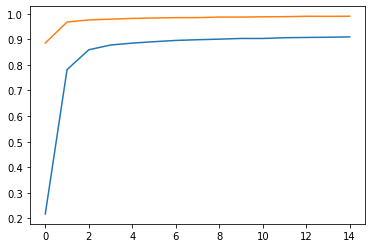

In [45]:
plt.plot(feed_foward_fit.history['accuracy'])
plt.plot(cnn_fit.history['accuracy'])

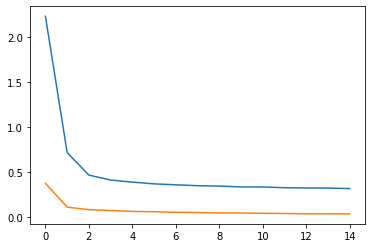

In [46]:
plt.plot(feed_foward_fit.history['loss'])
plt.plot(cnn_fit.history['loss'])